# PHYS 105: Computational Physics I
### Spring 2018
### In-Class Exercise 10.2

## Variable Time Steps


Lets now test another aspect of our computational setup. As we will see
below, things start breaking down as our projectile gets closer to the 
center of the Earth. A solution is outlined below.


  **Instructions**:

* **Plot** the trajectories in each case as functions of
time for $0 \le t \le 100$:
  1. $r_0 = 1.0, v_0 = 0.5, \delta t = 0.01$,
  2. $r_0 = 1.0, v_0 = 0.3, \delta t = 0.01$,
  3. $r_0 = 1.0, v_0 = 0.3, \delta t = 0.001$,

* **How** do you account for the differences between the graphs?



The problem of course is that the time step, which is fine at
$r\approx1$, begins to fail as the orbital separation $r$ decreases.

There is nothing about the predictor--corrector scheme we have been using
that requires us to keep the time step constant.
One way to remedy accuracy problems is to allow the time step to vary in a manner
dictated by the physics.  

* **Repeat** the previous calculations, but this
time choose the time step $\delta t$ at the start of each step
according to the rule

$$
  	\delta t = 0.01 r^{3/2}\,.
$$
  
Note that the scaling is the same as Kepler's third law.  

Your results should show that there is an improvement in accuracy.  What happens to the
orbit's precession?

In [1]:
import sys
from math import *
import matplotlib.pyplot as plt

def acc(x, y):
    # inverse-square law
    r = sqrt(x*x+y*y)
    return -GM*x/pow(r, 3), -GM*y/pow(r, 3) 		


def take_a_step(x, y, vx, vy, t, dt):
    # Predictor:
    ax, ay = acc(x, y)

    x  += vx*dt + 0.5*ax*dt*dt
    y  += vy*dt + 0.5*ay*dt*dt
    vx += ax*dt
    vy += ay*dt
    t  += dt

    # Corrector:
    ax1, ay1 = acc(x, y)

    vx += 0.5*(ax1-ax)*dt
    vy += 0.5*(ay1-ay)*dt

    return x,y,vx,vy,t



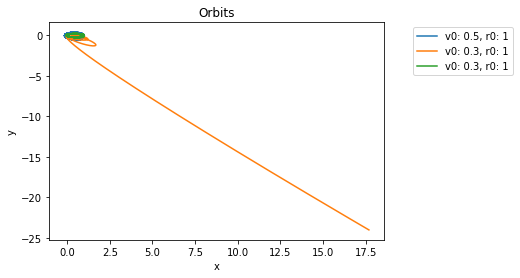

In [2]:


GM = 1.0				# define units
r0_list = [1, 1, 1]
v0_list = [.5, .3, .3]
dt_list = [.01, .01, .001]


for i in range(len(r0_list)):
    r0 = r0_list[i]
    v0 = v0_list[i]
    

    # Initialize the trajectory.
    t  = 0.0
    x  = r0
    y  = 0.0

    vx = 0.0
    vy = v0				# default is circular orbit

    dt    = dt_list[i]
    t_max = 100

    xplot = [x]
    yplot = [y]

    rmax = r0
    rmin = r0
    
    xmax = x
    ymax = y
    
    xmin = x
    ymin = y
    

    while t <= t_max:
        vx_p = vx
        
        (x,y,vx,vy,t) = take_a_step(x, y, vx, vy, t, dt)
        
        r_temp = sqrt(x**2 + y**2)
        
        if r_temp >= rmax: 
            rmax = r_temp
            xmax = x
            ymax = y
            
        if r_temp <= rmin: 
            rmin = r_temp
            xmin = x
            ymin = y
        
        xplot.append(x)
        yplot.append(y)
        
        
    plt.plot(xplot,yplot, label = 'v0: {}, r0: {}'.format(v0, r0))
    
    plt.title('Orbits')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.4,1))
        
    a = .5*(rmin + rmax)
    ratio = t**2 / a ** 3
    

## Question 1:

One issue I see is that for v0 = .3, r0 = 1 the body got to close to the earth and experienced, because of the too small time step, a sling shot effect because it had too large of a force because it got too close. The dt was too small to conserve momentum because it was going to fast, and that ultimately resulted in a very large force.


For r0 = 1.00, v0 = 0.50, the rmin = 0.14 and rmax = 1.00, and a = 0.57
For r0 = 1.00, v0 = 0.50, the Period = 100.00 and the ratio P^2 / a^3 = 39.49

For r0 = 1.00, v0 = 0.30, the rmin = 0.05 and rmax = 1.00, and a = 0.52
For r0 = 1.00, v0 = 0.30, the Period = 100.00 and the ratio P^2 / a^3 = 39.50


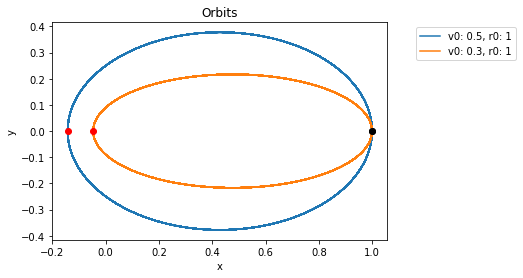

In [3]:
import sys
from math import *
import matplotlib.pyplot as plt

GM = 1.0				# define units
r0_list = [1, 1]
v0_list = [.5, .3]

for i in range(len(r0_list)):
    r0 = r0_list[i]
    v0 = v0_list[i]
    

    # Initialize the trajectory.
    t  = 0.0
    x  = r0
    y  = 0.0

    vx = 0.0
    vy = v0				# default is circular orbit
    
    dt = .001 * pow(r0, 3/2)
    t_max = 100

    xplot = [x]
    yplot = [y]

    rmax = r0
    rmin = r0
    
    xmax = x
    ymax = y
    
    xmin = x
    ymin = y
    
    max_min_counter = 0
    
    while t <= t_max:
        vx_p = vx
        
        (x,y,vx,vy,t) = take_a_step(x, y, vx, vy, t, dt)
        
        r_temp = sqrt(x**2 + y**2)
        dt = .001 * pow(r_temp, 3/2)
        
        if max_min_counter == 0:
            if r_temp >= rmax: 
                rmax = r_temp
                xmax = x
                ymax = y

            if r_temp <= rmin: 
                rmin = r_temp
                xmin = x
                ymin = y
            
            if (vx_p > 0) and (vx <= 0):
                t_period = t
                max_min_counter = 1
        
        xplot.append(x)
        yplot.append(y)
        
    plt.plot(xplot,yplot, label = 'v0: {}, r0: {}'.format(v0, r0))
    
    plt.plot(xmax, ymax, 'ko')
    plt.plot(xmin, ymin, 'ro')

    plt.title('Orbits')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.legend(bbox_to_anchor=(1.4,1))
        
    a = .5 * (rmin + rmax)
    ratio = t_period**2 / a ** 3
    
    print('\nFor r0 = {:.2f}, v0 = {:.2f}, the rmin = {:.2f} and rmax = {:.2f}, and a = {:.2f}'.format(r0, v0, rmin, rmax, a))
    print('For r0 = {:.2f}, v0 = {:.2f}, the Period = {:.2f} and the ratio P^2 / a^3 = {:.2f}'.format(r0, v0, t, ratio))



## Question 2:

The orbital precession is constant over the course of t and doesn't deviate. The orbital precession makes two solid lines which are lines built up of multiple orbits, meaning that the orbits stay on a constant path. 